<a href="https://colab.research.google.com/github/rajatbutola/Initial-Practice-Learning/blob/master/Mnist_data_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Minist Dataset**

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

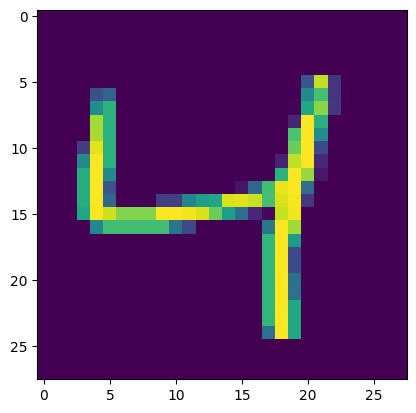

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [5]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [6]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [9]:
history = model.fit(X_train_scaled, y_train, epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.2876 - accuracy: 0.9167 - val_loss: 0.1552 - val_accuracy: 0.9575
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1269 - accuracy: 0.9626 - val_loss: 0.1171 - val_accuracy: 0.9655
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0877 - accuracy: 0.9743 - val_loss: 0.1059 - val_accuracy: 0.9675
Epoch 4/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0647 - accuracy: 0.9804 - val_loss: 0.0970 - val_accuracy: 0.9704
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0488 - accuracy: 0.9853 - val_loss: 0.0844 - val_accuracy: 0.9752
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0390 - accuracy: 0.9883 - val_loss: 0.0914 - val_accuracy: 0.9723
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0314 - accuracy: 0.9904 - val_loss: 0.0856 - val_accura

In [16]:
y_prob = model.predict(X_test_scaled)

313/313 [==============================] - 1s 2ms/step


In [17]:
y_pred = y_prob.argmax(axis=1)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9774

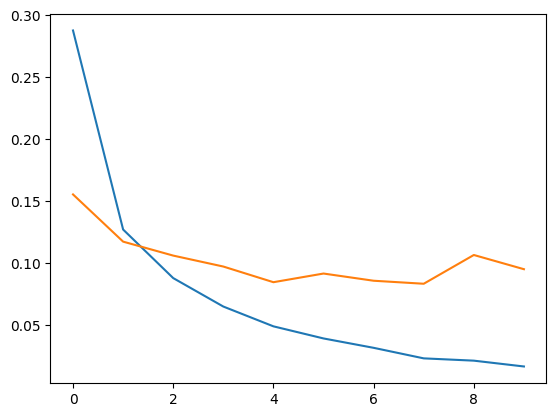

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

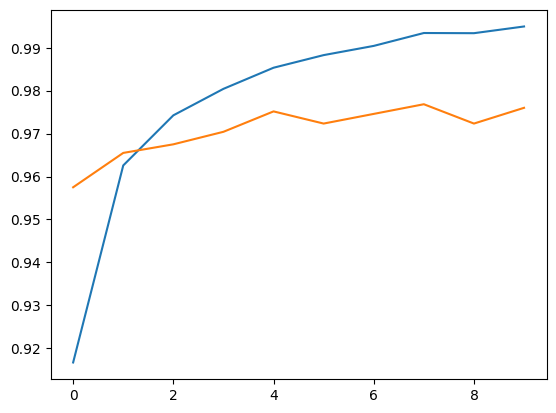

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

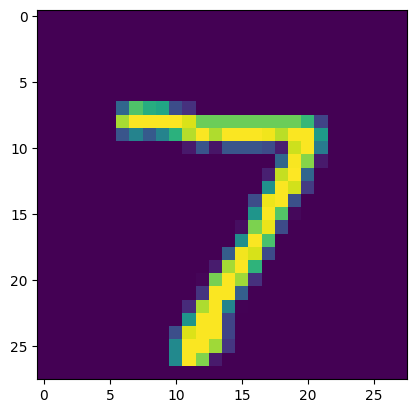

In [15]:
plt.imshow(X_test[0])

In [23]:
model.predict(X_test[2].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 88ms/step


array([1])